In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from cosmotd.fields import Field, save_fields, load_fields
import struct

1895


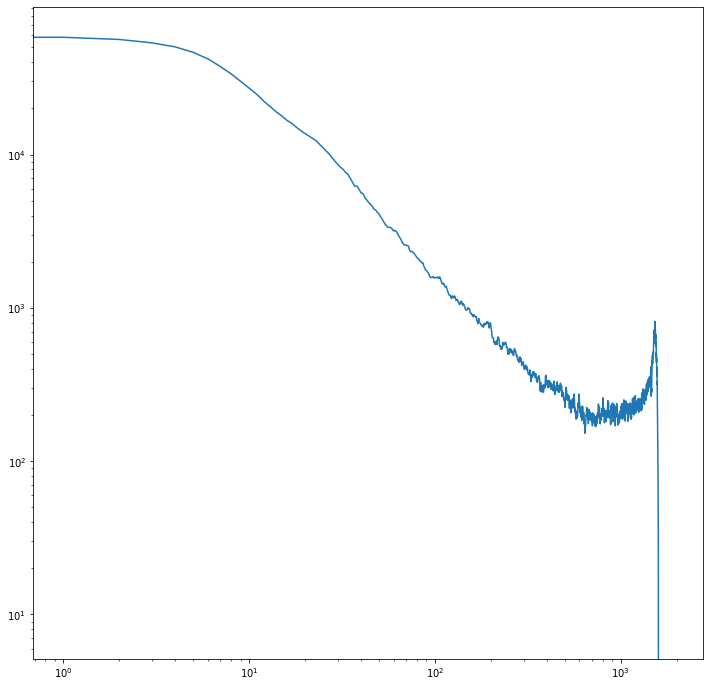

In [10]:
with open("data/data_cache/single_axion_string_count.data", "rb") as save_file:
    # The number of fields
    num_timesteps = struct.unpack("<I", save_file.read(4))[0]
    print(num_timesteps)
    string_counts = np.zeros(num_timesteps)

    for timestep in range(num_timesteps):
        string_counts[timestep] = struct.unpack("<i", save_file.read(4))[0]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

ax.loglog(range(num_timesteps), string_counts)

In [35]:
# [real_field, imaginary_field] = load_fields("single_axion_n1_check_phase.ctdd")
# [real_field, imaginary_field] = load_fields("end_of_single_axion.ctdd")
[real_field, imaginary_field] = load_fields("unstable_string.ctdd")

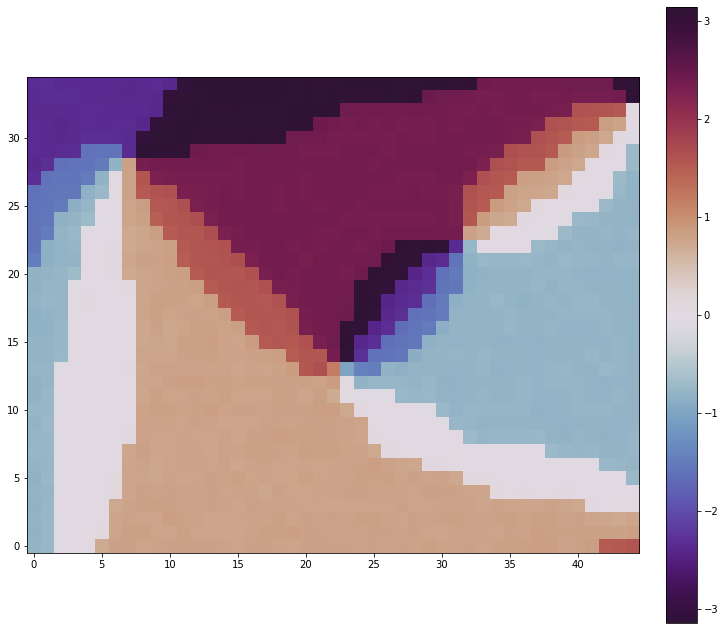

In [39]:
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

phase = np.arctan2(imaginary_field.value, real_field.value)[0:35, 35:80]
# phase = np.arctan2(imaginary_field.value, real_field.value)[50:100, 50:100]
# phase = real_field.value[0:50, 25:75]

img = ax.imshow(phase, vmin=-np.pi, vmax=np.pi, cmap="twilight_shifted", origin="lower")
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)



Text(0.5, 1.0, 'compare')

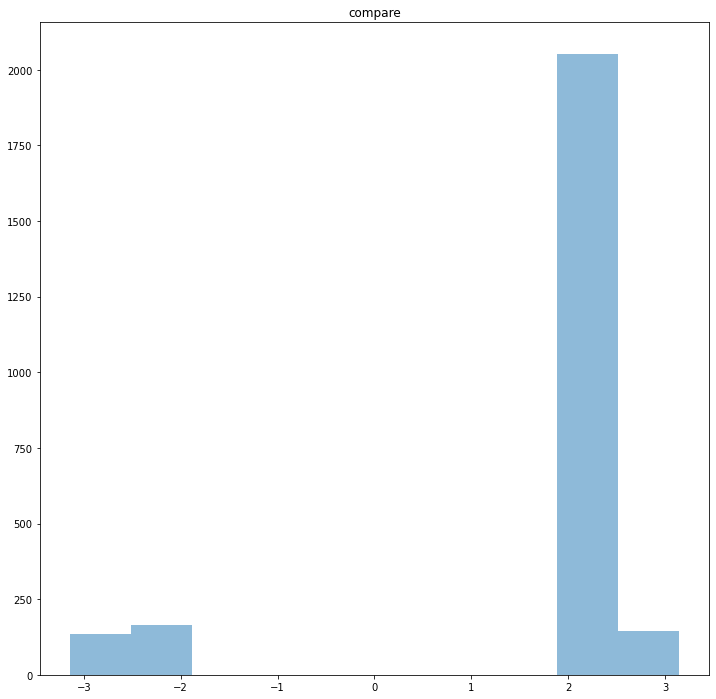

In [30]:
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

# hist_array, name = (real_field.value.flatten(), "real")
# hist_array, name = (imaginary_field.value.flatten(), "imaginary")
hist_array, name = (phase.flatten(), "phase")
# test_hist, name = (test_phase.flatten(), "test")
# target_hist, name = (target_phase.flatten(), "target")

ax.hist(hist_array, alpha=0.5, label=name)
# ax.hist(test_hist, alpha=0.5, label="test")
# ax.hist(target_hist, alpha=0.5, label="target")
ax.set_title("compare")

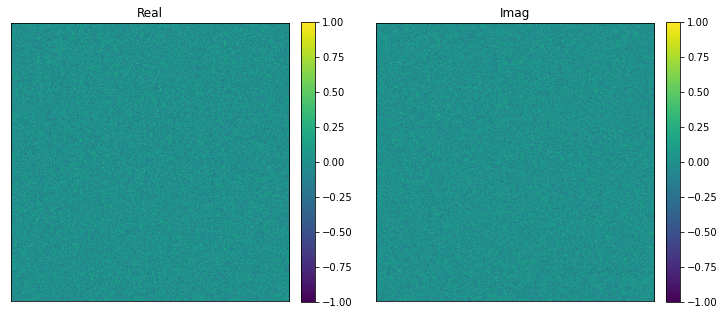

In [75]:
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

img1 = ax1.imshow(real_field.value, vmin=-1, vmax=1, cmap="viridis", origin="lower")
ax1.set_title("Real")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
img2 = ax2.imshow(imaginary_field.value, vmin=-1, vmax=1, cmap="viridis", origin="lower")
ax2.set_title("Imag")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
fig.colorbar(img1, ax=ax1, fraction=0.046, pad=0.04)
fig.colorbar(img2, ax=ax2, fraction=0.046, pad=0.04)



In [3]:
from cosmotd.single_axion import run_single_axion_simulation
from cosmotd.cosmic_strings import run_cosmic_string_simulation

[target_real, target_imag] = load_fields("single_axion_n1.ctdd")

simulation = run_single_axion_simulation(
    phi_real_field=target_real,
    phi_imaginary_field=target_imag,
    dx=1,
    dt=0.1,
    alpha=2,
    eta=1,
    era=1,
    lam=5,
    n=1,
    K=0.025,
    t0=75,
    growth=2,
    run_time=249)

# simulation = run_cosmic_string_simulation(
#     phi_real_field=target_real,
#     phi_imaginary_field=target_imag,
#     dx=1,
#     dt=0.1,
#     alpha=2,
#     eta=1,
#     era=1,
#     lam=5,
#     run_time=4000)

for [target_real, target_imag] in simulation:
    pass

real_field = target_real
imaginary_field = target_imag

In [6]:
[test_real, test_imag] = load_fields("single_axion_n1_glsl_single_step_check.ctdd")

In [177]:
value_flag = np.all(np.isclose(target_real.value, test_real.value))
velocity_flag = np.all(np.isclose(target_real.velocity, test_real.velocity))
acceleration_flag = np.all(np.isclose(target_real.acceleration, test_real.acceleration))

if value_flag and velocity_flag and acceleration_flag:
    print("The two fields are equal (within tolerance)")
if not value_flag:
    print("The two fields differ in field value!")
if not velocity_flag:
    print("The two fields differ in field velocity!")
if not acceleration_flag:
    print("The two fields differ in field acceleration!")
    

The two fields differ in field value!
The two fields differ in field velocity!
The two fields differ in field acceleration!


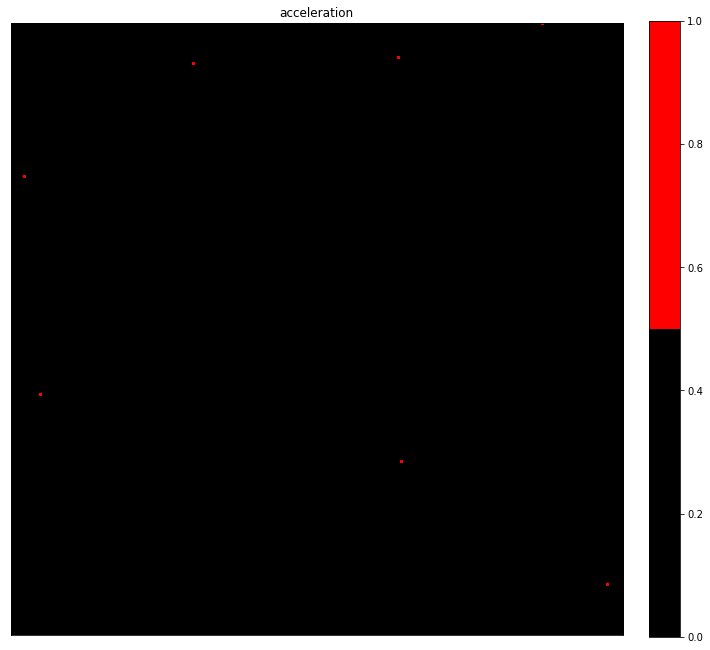

In [183]:
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

# to_show, name = (np.isclose(target_real.value, test_real.value).astype(np.float32), "value")
# to_show, name = (np.isclose(target_real.velocity, test_real.velocity).astype(np.float32), "velocity")
# to_show, name = (np.isclose(target_real.acceleration, test_real.acceleration).astype(np.float32), "acceleration")
to_show, name = (np.isclose(np.arctan2(target_imag.value, target_real.value), np.arctan2(test_imag.value, test_real.value)).astype(np.float32), "acceleration")

cmap = mpl.colors.ListedColormap(["black", "red"])

img = ax.imshow(to_show, vmin=0, vmax=1, cmap=cmap)
ax.set_title(name)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)


In [192]:
test_phase = np.arctan2(test_imag.value, test_real.value).flatten()

In [193]:
target_phase = np.arctan2(target_imag.value, target_real.value).flatten()

In [194]:
np.median(test_phase)

0.5534913578013191

In [195]:
np.median(target_phase)

0.5601481420337457

In [202]:
distance = np.abs(test_phase - target_phase)
distance[distance > np.pi] = 2 * np.pi - distance[distance > np.pi]

np.max(distance) / np.pi

0.08841192626080975